A continuação apresento a curva de luz normalizada com menor **rms** obtida com o polyfit (out_lc_from_p_ra_poli_g3_f1.dat), antes de aplicar a media deslizante.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_table('out_lc_from_p_ra_poli_g3_f1.dat',sep='\s+', header=None)
#df.describe() # mostra a estadistica das colunas
fig = plt.figure(figsize=(16,6))
plt.plot(df[0], df[1], 'ko-', color='black', markersize=4) 
# df[0]: tempo
# df[1]: fluxo
plt.show()

### Resultados de aplicar a media deslizante

O pandas de python permite aplicar a media deslizante com o seguinte comando. 

df[2] = df[1].rolling(window=2,center=False).mean()

Ele cria uma nova coluna df[2] com os valores da media deslizante. 

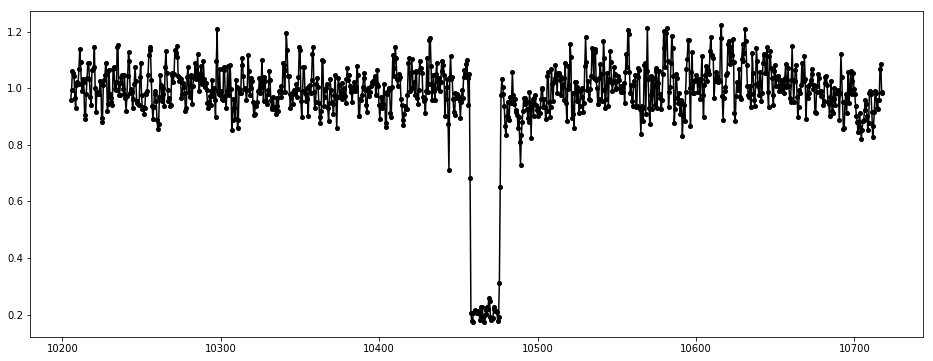

In [183]:
# tomando em comta dois pontos (windows = 2)
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4)
plt.show()

A continuação mostro a superposição da curva original e a curva obtida com a media deslizante para dois pontos

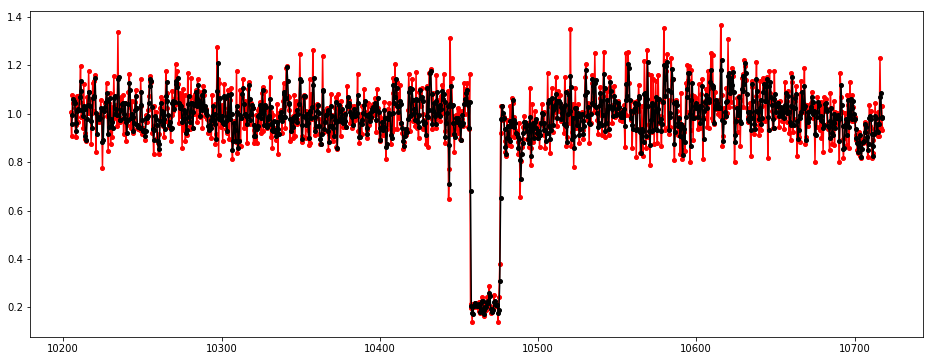

In [185]:
df[2] = df[1].rolling(window=2,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4)   # com media deslizante
plt.show()

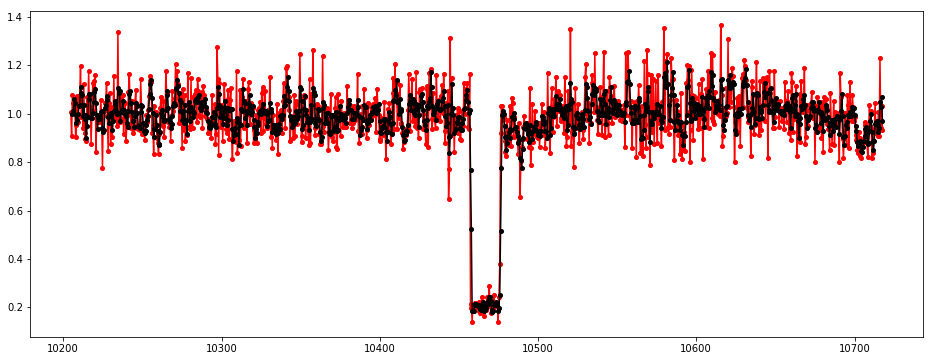

In [186]:
# tomando em comta treis pontos (windows = 3)
df[2] = df[1].rolling(window=3,center=False).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

Da figura pode-se ver que a media deslizante com treis pontos afeta a sinal do anel.

# Media deslizante para 5 pontos

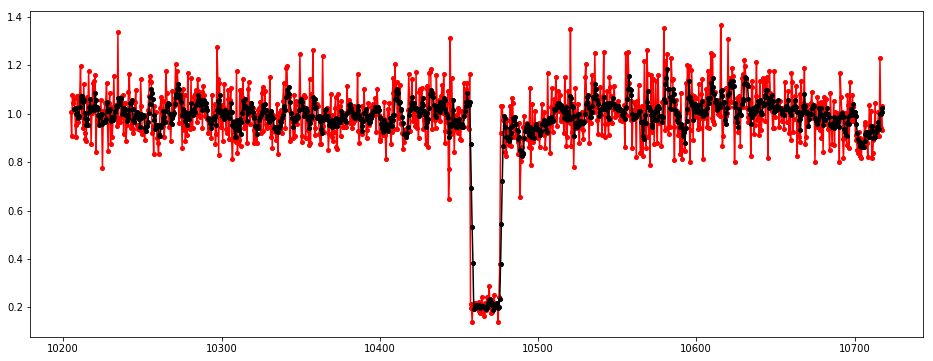

In [187]:
# tomando em comta treis pontos (windows = 5)
df[2] = df[1].rolling(window=5).mean()
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[2], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

Pode-se ver que para 5 pontos os aneis já não são percibidos

# Media deslizante com o peso do sigma

$$ \frac{(P1+P2)}{(2*\sigma)}= \frac{media}{\sigma}$$


0.031164023786491354


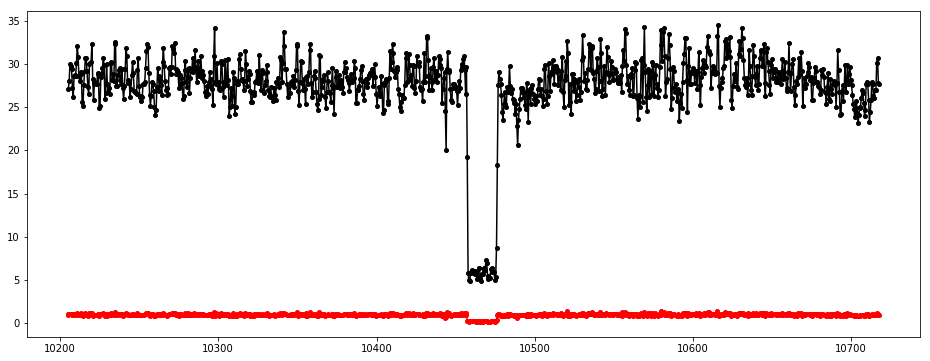

In [188]:
# para 2 pontos
c = (df[1].mean()/1000)**0.5 # sigma
print(c)
df[3] = df[1].rolling(window=2).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

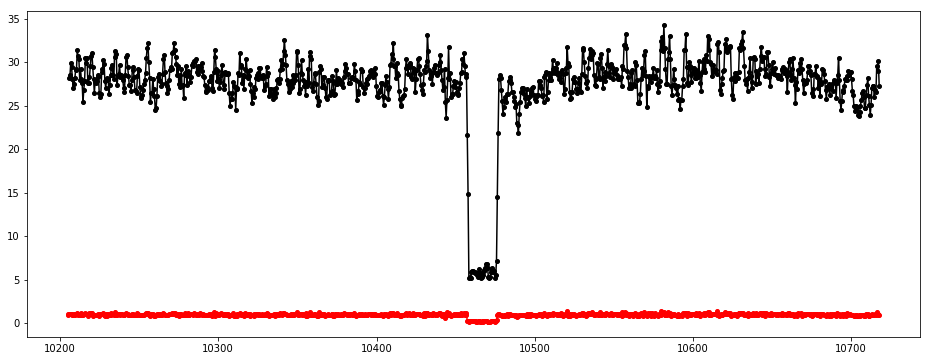

In [189]:
# para 3 pontos
df[2] = df[1].rolling(window=3).std(ddof=0) # sigma
df[3] = df[1].rolling(window=3).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

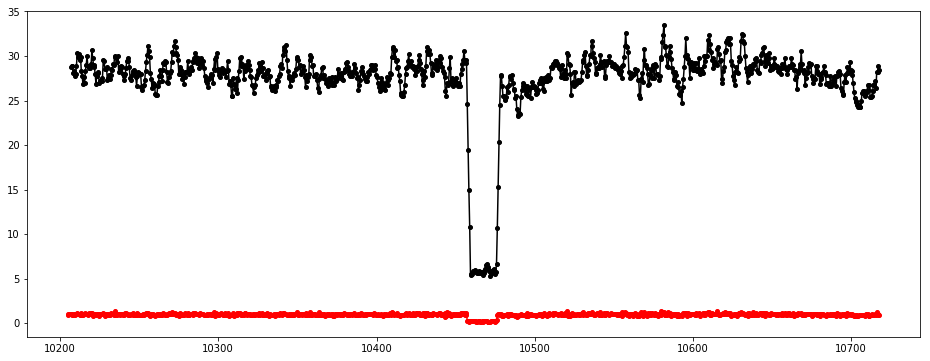

In [190]:
# para 5 pontos
df[2] = df[1].rolling(window=5).std(ddof=0) # sigma
df[3] = df[1].rolling(window=5).mean() # media
df[4] = df[3]/0.035471250525172658
fig = plt.figure(figsize=(16, 6))
plt.plot(df[0], df[1], 'ko-', color='red', markersize=4) # original
plt.plot(df[0], df[4], 'ko-', color='black', markersize=4) # media deslizante
plt.show()

# Aplicando a media deslizante no arquivo de saída do PRAIA_photometry

Aplicando a media deslizante sobre as colunas de fluxo (8, 11, 14, 17) das estrelas calibradoras do arquivo ***photo_char_final_lightcurve.dat***. Só para comparar eu fiz o promedio do fluxo das calibradoras e apliquei a media deslizante. No segundo caso, eu apliquei a media deslizante sobre cada uma das calibradoras e depois eu fiz o promedio.
Em ambos casos o resultado foi o mesmo como se mostra no plot.

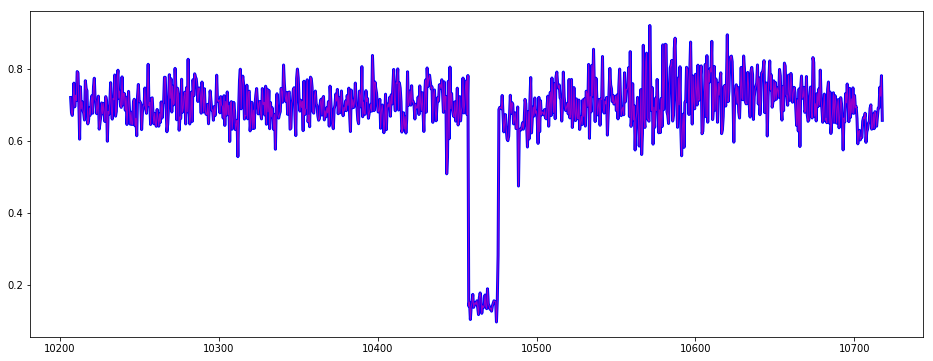

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
points = 5
df = pd.read_table("photo_char_final_lightcurve.dat", sep="\s+", header=None) # reading file photo_char_final_lightcurve.dat
# time in seconds
df[20] = (df[2] - 2457989.5) * 24 * 3600
# media deslizante sobre os promedio
df[21] = (df[7] + df[10] + df[13] + df[16])/4
df[22] = df[21].rolling(window=points).mean()
# media deslizante sobre as calibradoras
df[23] =  df[7].rolling(window=points).mean() 
df[24] = df[10].rolling(window=points).mean()
df[25] = df[13].rolling(window=points).mean()
df[26] = df[16].rolling(window=points).mean()
df[27] = (df[23] + df[24] + df[25] + df[26])/4
# plot 
# defining of size of plot
fig = plt.figure(figsize=(16, 6))
# Plotting
plt.plot(df[20], df[4]/df[22], 'b-', ms=2, lw=3.0) # rolling mean over calibrators star
plt.plot(df[20], df[4]/df[27], 'm', ms=2, lw=1., alpha=0.8) # rolling mean over each column and then average
plt.show()
#df[22]

O seguinte plot mostra a curva de luz (azul) quando é aplicado a media deslizante, e a curva de luz (vermelho) sim a aplicação da media deslizante  

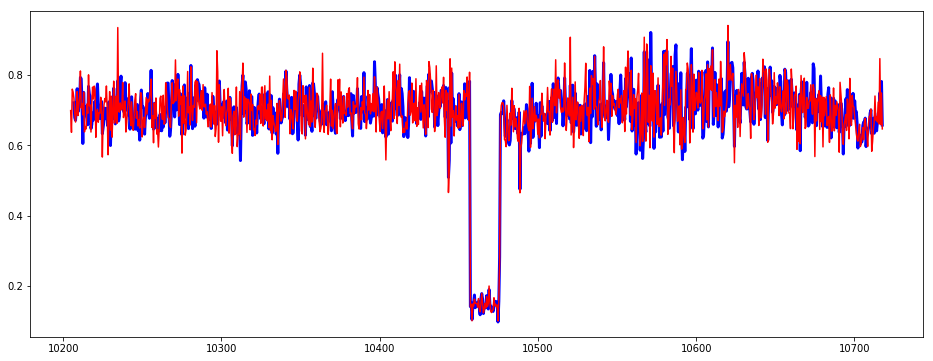

In [15]:
fig = plt.figure(figsize=(16, 6))
plt.plot(df[20], df[4]/df[27], 'b', ms=2, lw=3.) # rolling mean over each column and then average
plt.plot(df[20], df[4]/df[21], 'r-', ms=2, lw=1.5) # original
plt.show()

# Usando a formula dada pelo Julio

Só para fazer a comparação, emseguida se mostra os resultados com a formula fornecida pelo Julio

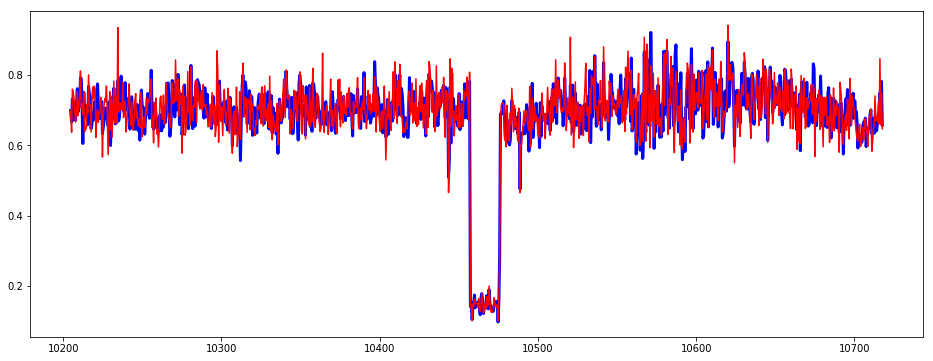

In [16]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14+$17)/4);array[mod]=(($8+$11+$14+$17)/4); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14+$17)/4, sum/count}' photo_char_final_lightcurve.dat > teste.dat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

teste = pd.read_table("teste.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(teste[0], teste[1]/teste[3], 'b-', ms=5, lw=3.0) # media deslizante
plt.plot(teste[0], teste[1]/teste[2], 'r-', ms=2, lw=1.5) # original
plt.show()
#teste[3]

Pode-se ver que que tanto com a ferramenta de python e o codigo fornecido pelo Julio, produz o mesmo resultado

# A continuação se mostra os resultados da fotometria utilizando a configuração do PRAIA_photometry.dat usado pelo Julio. 

Para fazer a fotometria ele considera só treis estrelas de calibração

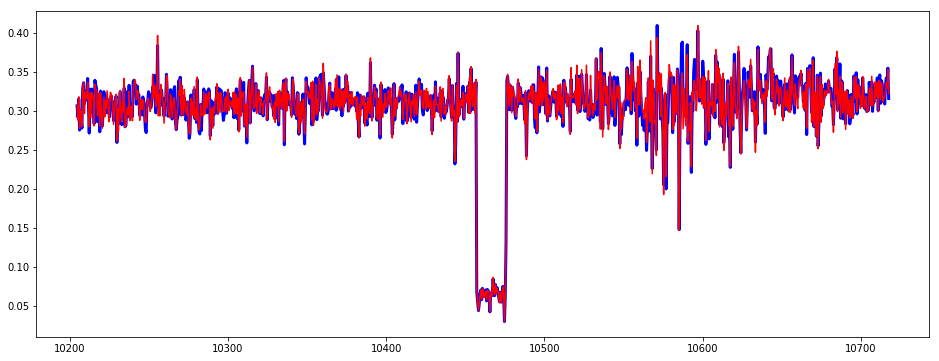

In [25]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14)/3);array[mod]=(($8+$11+$14)/3); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14)/3, sum/count}' photometry_Chariklo_2017Ago23.dat > teste_julio_config.dat
result = pd.read_table("teste_julio_config.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result[0], result[1]/result[3], 'b-', ms=2, lw=3.0) # media deslizante
plt.plot(result[0], result[1]/result[2], 'r-', ms=2, lw=1.5) # original
plt.show()

Para o seguinte plot foi considerado uma estrela a mais con respeito á configuração anterior (4 estrelas de calibração). 

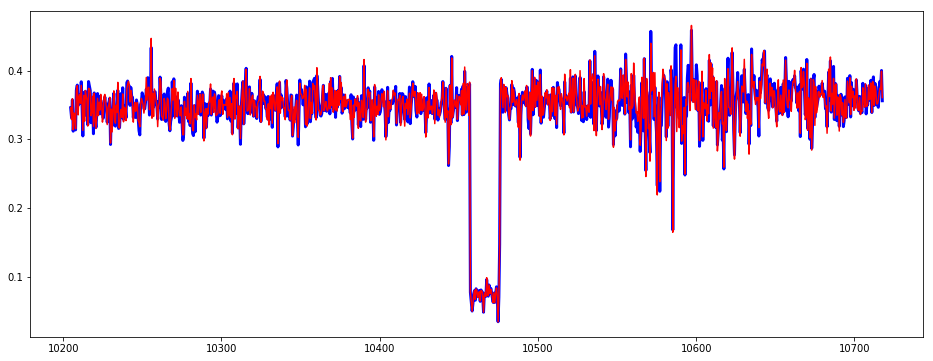

In [5]:
! awk 'BEGIN{size=5} {mod=NR%size; if(NR<=size){count++}else{sum-=array[mod]};sum+=(($8+$11+$14+$17)/4);array[mod]=(($8+$11+$14+$17)/4); print ($3-2457989.5)*24*3600, $5, ($8+$11+$14+$17)/4, sum/count, $8, $11, $14, $17}' photometry_Chariklo_2017Ago23_4_calib.dat > teste_julio_config_4_calib.dat
result1 = pd.read_table("teste_julio_config_4_calib.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result1[0], result1[1]/result1[3], 'b-', ms=2, lw=3.0) # media deslizante
plt.plot(result1[0], result1[1]/result1[2], 'r-', ms=2, lw=1.5) # original
plt.show()

O seguinte plot mostra o comportamento dos fluxoa das estrelas calibradoras

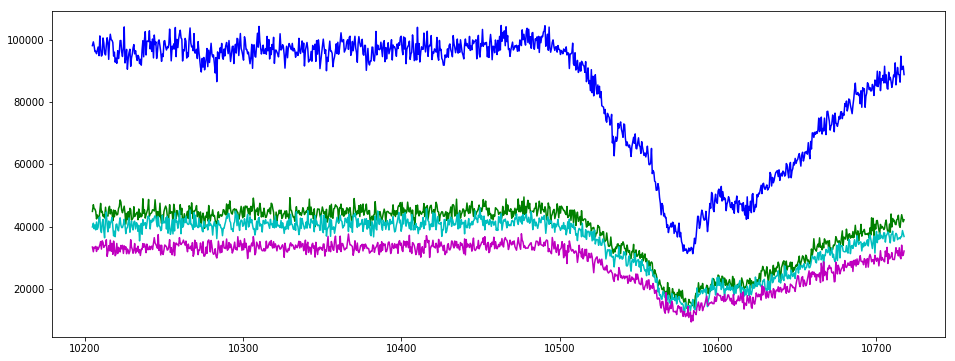

In [27]:
result1 = pd.read_table("teste_julio_config_4_calib.dat", sep="\s+", header=None)
fig = plt.figure(figsize=(16, 6))
plt.plot(result1[0], result1[4], 'b-', ms=2, lw=1.5)
plt.plot(result1[0], result1[5], 'g-', ms=2, lw=1.5)
plt.plot(result1[0], result1[6], 'c-', ms=2, lw=1.5)
plt.plot(result1[0], result1[7], 'm-', ms=2, lw=1.5)
plt.show()